### Import libraries

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os

import matplotlib.pyplot as plt

### load data (Mocking example)

In [6]:
num_skipped = 0
root_dir = ".datasets/"
for folder_name in ("Cat", "Dog"):
    folder_path = os.path.join(root_dir + "PetImages", folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
        finally:
            fobj.close()

        if not is_jfif:
            num_skipped += 1
            # Delete corrupted image
            os.remove(fpath)

print(r"Deleted % images" % num_skipped)

Deleted  1578mages


### Generate a dataset.

In [8]:
image_size = (180, 180)
batch_size = 128

train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(
    root_dir + "PetImages",
    validation_split=0.2,
    subset="both",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 23422 files belonging to 2 classes.
Using 18738 files for training.
Using 4684 files for validation.


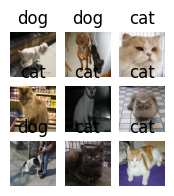

In [15]:
plt.figure(figsize=(2, 2))
for images, labels in train_ds.take(1): # This takes random data. ()
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('dog' if labels[i] == 1 else 'cat')
        plt.axis("off")